In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('regressao_Q1.csv')
df.shape

(3000, 11)

In [7]:
# IMPORTANTE: NESTE CASO ESPECIFICAMENTE NÃO VOU FAZER UM SPLIT DE TESTE
# o objetivo aqui é apenas carregar as funções de exemplo e implementar MODELOS e METRICAS!
# os dados já estão pre-processados!

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
# Separando as features (X) e o target (y)
X = df.drop(columns=['target'])
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# MODELOS

#### REGRESSÃO LINEAR

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [41]:
# b0
model.intercept_

0.004657870426561923

In [42]:
# b1
model.coef_

array([ 1.85455535e-05, -8.76341521e-06, -1.61999906e-06,  1.84989481e-06,
        4.79023372e-01,  9.10605317e-01, -4.28268228e-08, -3.90852875e-06,
       -7.23852058e-06, -1.04943066e-06])

In [46]:
## Return the coefficient of determination of the prediction (R2)
model.score(X_train, y_train)

0.9999997365449735

#### GLM

In [50]:
import statsmodels.api as sm

mod = sm.GLM(y_train, X_train, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2400
Model:                            GLM   Df Residuals:                     2390
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2812.0
Date:                Sun, 12 May 2024   Deviance:                       71893.
Time:                        08:22:28   Pearson chi2:                 7.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             -1.835
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
v_1            0.0175      0.017      1.013      0.311      -0.016       0.051
v_2           -0.0096      0.018     -0.531      0.595      -0.045       0.026
v_3            0.0401      0.018      2.187      0.029       0.004       0.076
v_4           -0.0185      0.018     -1.015      0.310      -0.054       0.017
v_5            0.3615      0.018     20.449      0.000       0.327       0.396
v_6            0.6559      0.015     44.051      0.000       0.627       0.685
v_7            0.0020      0.018      0.114      0.909      -0.032       0.037
v_8           -0.0145      0.018     -0.801      0.423      -0.050       0.021
v_9            0.0325      0.017      1.880      0.060      -0.001       0.066
v_10          -0.0073      0.018     -0.403      0.687      -0.043       0.028
==============================================================================
"""

In [51]:
y_test_pred_glm = res.predict(X_test)
print(y_test_pred_glm)

1506    1.130056
862     1.647212
1234    0.389336
1132    0.736568
506     2.636844
          ...   
1424    0.629412
1060    1.064090
813     1.041910
2745    0.898846
1347    0.345835
Length: 600, dtype: float64


In [54]:
r2(y_test, y_test_pred_glm)

-0.9597060751916444

#### ARVORE DE REGRESSÃO

In [55]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predict = model.predict(X_test)

#### KNN (aplicado na regressão)

In [57]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)
predict = model.predict(X_test)

#### SVM (SVR)

In [56]:
from sklearn.svm import SVR

model = SVR(kernel='linear', C=0.01)
model.fit(X_train, y_train)
predict = model.predict(X_test)

# BAGGING

In [ ]:
Abordagem: paralela (modelos independentes)
Foco: Reduzir variancia
Tipo de Agregação: Média (regressão) e Votação (classificação)
Complexidade: menos sensível a overfitting

#### RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 10)
model.fit(X_train, y_train)
predict = model.predict(X_test)

# BOOSTING

In [ ]:
Abordagem: sequencial (modelos corrigem erros)
Foco: Reduzir viés
Tipo de Agregação: Média ponderada
Complexidade: possível sensibilidade a overfitting

#### GRADIENT BOOSTING REGRESSOR

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators = 10)
model.fit(X_train, y_train)
predict = model.predict(X_test)

#### XGBOOST REGRESSOR

In [67]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
predict = model.predict(X_test)

# REDES NEURAIS

In [63]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(max_iter=1000)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [64]:
r2_score(y_test, predict)

0.9946500685105553

In [ ]:
# Verificando o numero de variaveis independentes para explorar o numero de camadas ocultas

In [60]:
X_test.shape

(600, 10)

In [ ]:
(10 + 1) / 2

In [ ]:
# 10 -> 6 -> 6 -> 1

In [65]:
model = MLPRegressor(max_iter=1000, hidden_layer_sizes=(6,6))
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [66]:
r2_score(y_test, predict)

0.9969641634547534

# REGULARIZAÇÃO L1 E L2

#### Regressão Ridge (L2):

In [75]:
from sklearn.linear_model import Lasso, Ridge # l1, l2
from sklearn.model_selection import cross_val_score
from statistics import mean

# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 99.99997231416387
0.5 : 99.99996938849827
0.75 : 99.99996451838912
1.0 : 99.99995770499478
1.25 : 99.99994894947291
1.5 : 99.99993825298048
1.75 : 99.9999256166738
2.0 : 99.99991104170844


In [76]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 0.25)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.9999997082383828


#### Regressão Lasso (L1):

In [77]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 86.68689035920995
0.5 : 51.689152220227676
0.75 : 19.220903869479827
1.0 : -0.10283843588469344
1.25 : -0.10283843588469344
1.5 : -0.10283843588469344
1.75 : -0.10283843588469344
2.0 : -0.10283843588469344


In [79]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 0.25, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.86472718372588


##### Comparando e visualizando os resultados

In [81]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

Linear Regression : 0.9999997301437422
Ridge Regression : 0.9999997082383828
Lasso Regression : 0.86472718372588


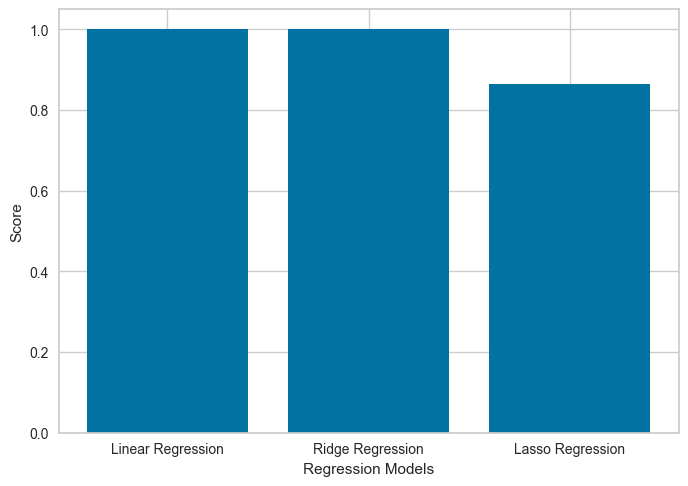

In [84]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = linearModel.score(X_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))


# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

# METRICAS

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### R2

R2 : R2| R quadrado, também conhecido como COEFICIENTE DE DETERMINAÇÃO diz respeito ao quanto
da variância dos dados esta sendo explicada pelo modelo. Varia entre 0 e 1, sendo que 1
significa que esta totalmente explicado e 0 que não esta explicando nada e é a mesma coisa que usar
a média. Em situações que o valor assume valores negativos sem interpretação numérica, porém a media é um estimador melhor.

Em resumo quanto maior melhor. Um limitação dessa métrica é que que com a inserção de regressores ao modelo o R2 tende a aumentar.

R2 = 1 é perfeita (no entanto pode ser que exista um overfiting)
R2 = 0,01 possivelmente há um underfiting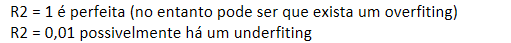

In [ ]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y_test, predict)

0.9947387865583491

In [86]:
# FUNÇÃO PERSONALIZADA PARA CALCULAR O R2 e o R2 Ajustado
def r2(actual: np.ndarray, predicted: np.ndarray):
    """ R2 Score """
    return r2_score(actual, predicted)

def adjr2(actual: np.ndarray, predicted: np.ndarray, rowcount: np.int, featurecount: np.int):
    """ R2 Adjusted Score """
    return 1-(1-r2(actual,predicted))*(rowcount-1)/(rowcount-featurecount)

In [87]:
# R2 (simples)
r2(y_test, predict)

0.9947387865583491

#### R2 AJUSTADO

Diferente do 𝑅², o 𝑅² ajustado não sofre a limitação de nunca decair. Caso seja inserido um modelo de regressão uma variável que não seja importante o 𝑅² ajustado irá diminuir.

Uma característica do 𝑅² ajustado é que ele pode ser negativo e por isso ele não pode ser interpretado como uma proporção. Além disso essa medida serve para fazer a comparação entre modelos diferentes.

In [88]:
# R2 Ajustado
adjr2(y_test, predict, X_test.shape[0], X_test.shape[1])

0.9946585307600867

#### MSE

É calculado o erro quadrado para todas as amostras e tiro a média.

In [89]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predict)

0.005203122919533855

#### RMSE

É a raiz quadrada da MSE, sendo esta uma métrica mais interpretável

In [90]:
np.sqrt(mean_squared_error(y_test, predict))

0.07213267581016147

#### MAE

É calculado o erro absoluto para todas as amostras e tiro a média. Mais robusta a outliers que a RMSE

In [91]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predict)

0.04639755922554897

## RESIDUOS

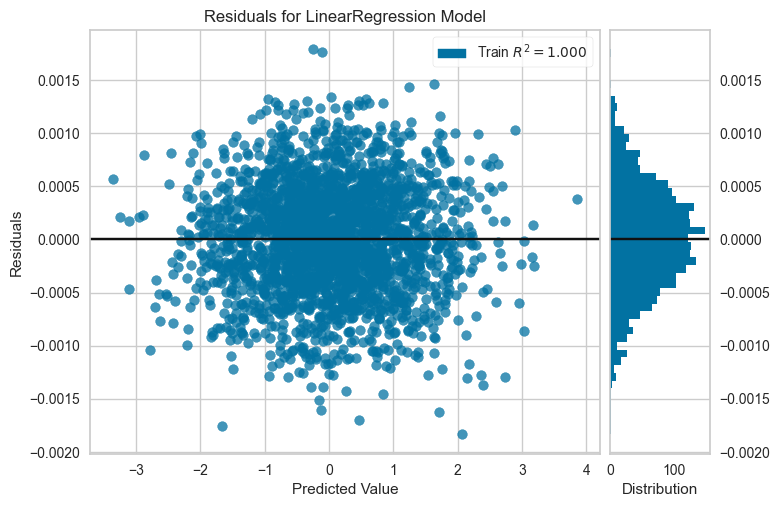

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [37]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(model)
visualizador.fit(X_train, y_train)
visualizador.poof()

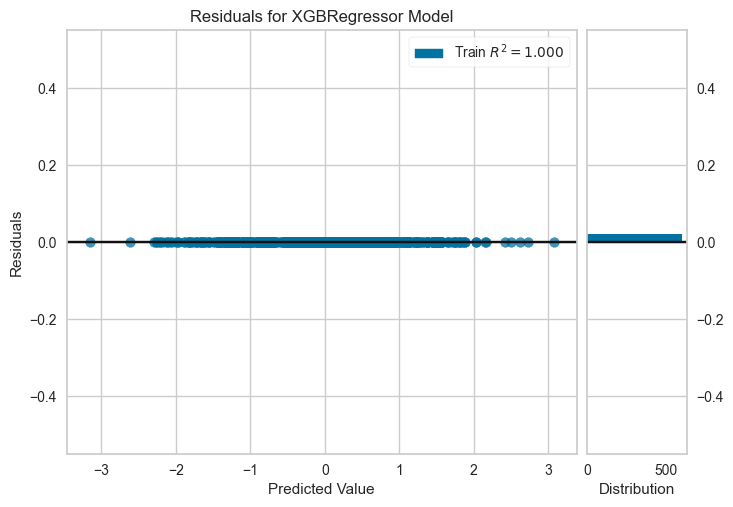

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [94]:
visualizador = ResidualsPlot(model)
visualizador.fit(X_test, predict)
visualizador.poof()

### Varias dicas sobre a interpretação do statsmodels
https://ivanildo-batista13.medium.com/regress%C3%A3o-linear-m%C3%BAltipla-em-python-eb4b6603a3